<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Ecommerce of Cosmetics Data Analytics Project 美妆电商平台数据分析项目</h2>

<h4>Dataset from Kaggle</h4>
Rui Kang- 康睿<br>
March 1st, 2021<br><br><br>


![pic](https://chemicalsinourlife.echa.europa.eu/documents/23718410/23807413/c_cosmetics_lg.jpg/e22a4675-5c9e-8e05-4649-7042a9aed269?t=1560171643352)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Part 1 Import Essential Packages & Dataset

In [1]:
import pandas as pd # data science essentials
import seaborn as sns # essential graphical output
import matplotlib.pyplot as plt # enhanced graphical output
import numpy as np # mathematical essentials
import os

In [2]:
import dask as da
import dask.dataframe as dd
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
import plotly.graph_objs as go
import chart_studio.plotly as py

In [102]:
import random
from scipy import stats
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [9]:
#Folder_Path = r'C:\Users\ryank\Desktop\python_work\Ecommerce_cos\datasets'          
#SaveFile_Path =  r'C:\Users\ryank\Desktop\python_work\Ecommerce_cos\datasets'
#SaveFile_Name = r'cosmetics_ec.csv'  

#修改当前工作目录
#os.chdir(Folder_Path)

#将该文件夹下的所有文件名存入一个列表
#file_list = os.listdir()
 
#读取第一个CSV文件并包含表头
#df = pd.read_csv(Folder_Path +'\\'+ file_list[0])   #编码默认UTF-8，若乱码自行更改
 
#将读取的第一个CSV文件写入合并后的文件保存
#df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False)
 
#循环遍历列表中各个CSV文件名，并追加到合并后的文件
#for i in range(1,len(file_list)):
#    df = pd.read_csv(Folder_Path + '\\'+ file_list[i])
#    df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False, header=False, mode='a+')

In [42]:
#cos = pd.read_csv(r'C:\Users\ryank\Desktop\python_work\Ecommerce_cos\datasets\cosmetics_ec.csv')

# Part 2 Data Cleaning

In [47]:
# Split event_time column
#cos['event_time'] = cos['event_time'].map(lambda x: x.rstrip('UTC'))

In [49]:
# Drop useless columns
#cos = cos.drop(columns=['category_code','product_id','category_id','user_session'])

# Drop duplicates
#cos = cos.drop_duplicates()

# Convert "event_time" to DateTime format
#cos['event_time']=pd.to_datetime(cos['event_time'],infer_datetime_format=True)

# Drop brand missing values
#cos.dropna(subset=['brand'],inplace=True)

In [50]:
# Write the cleaned dataset to a new file
#cos.to_csv(path_or_buf = r'C:\Users\ryank\Desktop\python_work\Ecommerce_cos\datasets\cosmetics_clean.csv',
#           index = False)

In [3]:
# Load clean data
cos_df = pd.read_csv(r'C:\Users\ryank\Desktop\python_work\Ecommerce_cos\datasets\cosmetics_clean.csv')

# Show first 5 rows
cos_df.head(5)

,event_time,event_type,brand,price,user_id
0,2019-12-01 00:00:00,remove_from_cart,f.o.x,6.27,576802932
1,2019-12-01 00:00:00,view,cnd,29.05,412120092
2,2019-12-01 00:00:02,cart,runail,1.19,494077766
3,2019-12-01 00:00:05,view,freedecor,0.79,348405118
4,2019-12-01 00:00:09,view,runail,2.62,560109803


In [75]:
cos_df['month_year'] = pd.to_datetime(cos_df['event_time']).dt.to_period('M')
cos_df['date'] = pd.to_datetime(cos_df['event_time']).dt.to_period('D')
cos_df['hour'] = pd.to_datetime(cos_df['event_time']).dt.hour
cos_df['month'] = pd.to_datetime(cos_df['event_time']).dt.month

cos_df.head()

,event_time,event_type,brand,price,user_id,month_year,date,hour,month
0,2019-12-01 00:00:00,remove_from_cart,f.o.x,6.27,576802932,2019-12,2019-12-01,0,12
1,2019-12-01 00:00:00,view,cnd,29.05,412120092,2019-12,2019-12-01,0,12
2,2019-12-01 00:00:02,cart,runail,1.19,494077766,2019-12,2019-12-01,0,12
3,2019-12-01 00:00:05,view,freedecor,0.79,348405118,2019-12,2019-12-01,0,12
4,2019-12-01 00:00:09,view,runail,2.62,560109803,2019-12,2019-12-01,0,12


In [76]:
cos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11064490 entries, 0 to 11064489
Data columns (total 9 columns):
 #   Column      Dtype    
---  ------      -----    
 0   event_time  object   
 1   event_type  object   
 2   brand       object   
 3   price       float64  
 4   user_id     int64    
 5   month_year  period[M]
 6   date        period[D]
 7   hour        int64    
 8   month       int64    
dtypes: float64(1), int64(3), object(3), period[D](1), period[M](1)
memory usage: 759.7+ MB


# Part 3 Initial Exploration of the Dataset

In [77]:
# using .shape to view (ROWS, COLUMNS)
view = cos_df.shape

# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {view[0]}
Features:     {view[1]}
""")


Size of Original Dataset
------------------------
Observations: 11064490
Features:     9



In [78]:
# Information about each variable
cos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11064490 entries, 0 to 11064489
Data columns (total 9 columns):
 #   Column      Dtype    
---  ------      -----    
 0   event_time  object   
 1   event_type  object   
 2   brand       object   
 3   price       float64  
 4   user_id     int64    
 5   month_year  period[M]
 6   date        period[D]
 7   hour        int64    
 8   month       int64    
dtypes: float64(1), int64(3), object(3), period[D](1), period[M](1)
memory usage: 759.7+ MB


In [79]:
# descriptive statistics for numeric data
cos_df.describe(include = 'number').round(2)

,price,user_id,hour,month
count,11064490.00,1.106449e+07,11064490.00,11064490.00
mean,9.83,5.233941e+08,13.07,7.13
std,22.11,8.736598e+07,5.46,4.69
min,0.00,4.654960e+05,0.00,1.00
25%,2.30,4.859161e+08,9.00,2.00
50%,4.22,5.555118e+08,13.00,10.00
75%,7.41,5.807773e+08,18.00,11.00
max,327.78,6.220901e+08,23.00,12.00


In [80]:
# No missing values now
cos_df.isnull().sum()

event_time    0
event_type    0
brand         0
price         0
user_id       0
month_year    0
date          0
hour          0
month         0
dtype: int64

# Part 4 Exploratory Data Analysis

## Customer behavior proportion

In [81]:
# Calculate each behavior frequency
a = cos_df.groupby(['event_type']).size().reset_index(name='counts')

# Calculate the proportion of each behavior
a['Rate'] = (a['counts'] / len(cos_df)).round(4)

# Show the data frame
a.head()

,event_type,counts,Rate
0,cart,3207585,0.2899
1,purchase,536536,0.0485
2,remove_from_cart,1644922,0.1487
3,view,5675447,0.5129


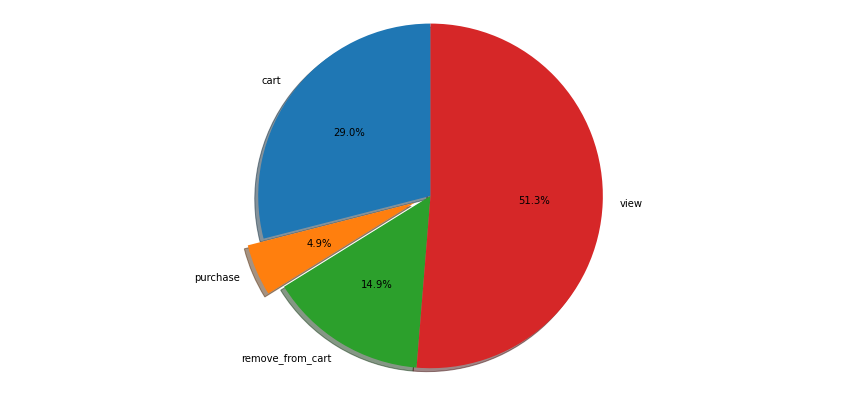

In [82]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = a['event_type']
sizes = a['Rate']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots(figsize = (15, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Insights：

- Customer purchased only 5% of items while viewd about 51% of items in online store.
- The items added to cart were around 29% and removed are around 15%.
- It is noticeable that almost 51.3% of the products added in cart was removed (1644922/3207585)
- In ecommerce, the conversion rate represents the percentage of visitors that make a purchase. In this case it is 4.9% which is really high compare to the average conversion rate in general in ecommerce

## Visitors tracking by day

In [83]:
# Subset the data that only show view behavior
view_cus = cos_df.loc[:,:][cos_df['event_type'] == 'view']

# Calculate each momth's total visitors
b = view_cus.groupby(['date']).size().reset_index(name='Visitors')

b  = b.set_index('date')

# Show the data frame
b.head()

,Visitors
date,
2019-10-01,37381
2019-10-02,46244
2019-10-03,34636
2019-10-04,33154
2019-10-05,30469


<AxesSubplot:xlabel='date'>

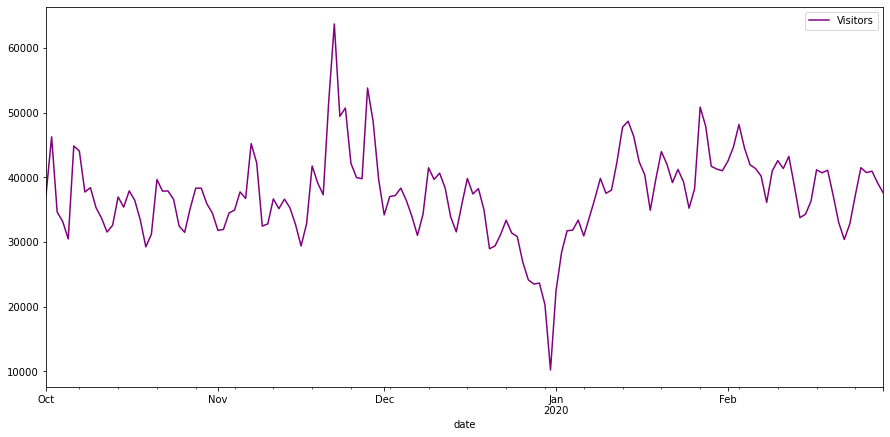

In [84]:
# line chart
b.plot(color = 'purple',figsize = (15, 7))

Insights:

- According to the line plot above, the traffic peak of each month occurred before the middle of month. This is because people got paid during that period. 

- Near the end of the November, there was a extremely high peak of traffic. This is attributed to the discount and promotion of thanksgiving and Black Friday.

- At the end of December, the traffic was very low. It is probably owing to the new year time, people will spend time with family and friends instead of shopping online.

## Customer behavior Funnel of brand

In [85]:
# Calculate each momth's total visitors
c = cos_df.groupby(['brand','event_type']).size().reset_index(name='counts')

zinger = c.loc[:,:][c['brand'] == 'zinger']

In [86]:
zinger

,brand,event_type,counts
1028,zinger,cart,34572
1029,zinger,purchase,8212
1030,zinger,remove_from_cart,15288
1031,zinger,view,59719


In [87]:
data = dict(
    number=[59719,34572,15288,8212],
    stage=['View','Add Cart','Remove From Cart','Purchase'])

fig = go.Figure(go.Funnel(
    y = ['View','Add Cart','Remove From Cart','Purchase'],
    x = [59719,34572,15288,8212],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal"],
    "line": {"width": [4, 2, 2, 3, 1], "color": ["wheat", "wheat", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

## Behavior by time

In [88]:
# Group by hour and event_type
f = cos_df.groupby(['hour','event_type']).size().reset_index(name='counts')

f.head()

,hour,event_type,counts
0,0,cart,34311
1,0,purchase,4956
2,0,remove_from_cart,15356
3,0,view,51586
4,1,cart,31190


In [89]:
# Transform event_type rows to columns 
f_new = pd.pivot_table(f, values='counts', index=['hour'],
                    columns=['event_type'], aggfunc=np.sum)

# make the index right
f_new = pd.DataFrame(f_new.to_records()).rename(columns={'event_type':'index'})

f_new.head()

,hour,cart,purchase,remove_from_cart,view
0,0,34311,4956,15356,51586
1,1,31190,4628,14990,44840
2,2,37622,4822,15963,51154
3,3,46063,6186,23827,72837
4,4,63722,9044,31960,107431


<AxesSubplot:title={'center':'Grouped Bar Graph with Customer Behavior'}, xlabel='hour'>

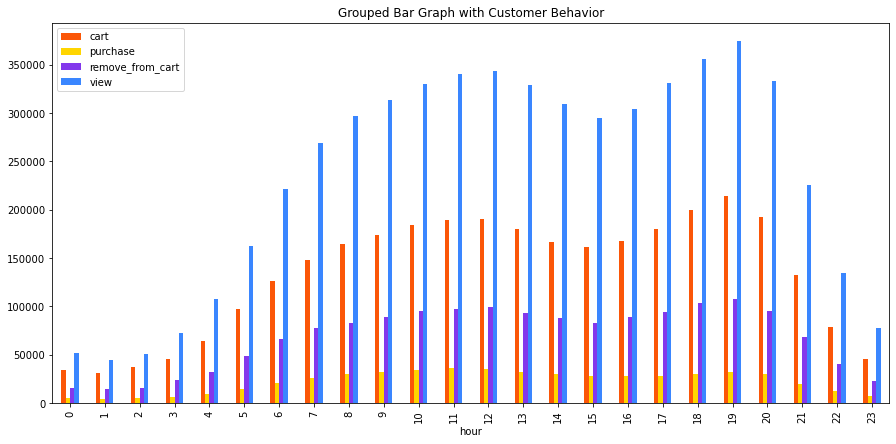

In [90]:
# Visualize each hour customer behavior
f_new.plot(x='hour', 
        kind='bar', 
        stacked=False, 
        figsize = (15, 7),
        title='Grouped Bar Graph with Customer Behavior',
        color = ['#fb5607','#ffd500','#8338ec','#3a86ff']) 

Insights:

- Customers' behaviors in this platform most happened around lunch time and dinner time. 

## Purchase behavior of customers

In [91]:
cos_df.head()

,event_time,event_type,brand,price,user_id,month_year,date,hour,month
0,2019-12-01 00:00:00,remove_from_cart,f.o.x,6.27,576802932,2019-12,2019-12-01,0,12
1,2019-12-01 00:00:00,view,cnd,29.05,412120092,2019-12,2019-12-01,0,12
2,2019-12-01 00:00:02,cart,runail,1.19,494077766,2019-12,2019-12-01,0,12
3,2019-12-01 00:00:05,view,freedecor,0.79,348405118,2019-12,2019-12-01,0,12
4,2019-12-01 00:00:09,view,runail,2.62,560109803,2019-12,2019-12-01,0,12


In [92]:
cos_new = cos_df.loc[:,['price','hour']][cos_df['event_type'] == 'purchase']

cos_new.head()

,price,hour
297,0.38,0
298,0.37,0
299,0.79,0
300,1.10,0
347,4.76,0


<AxesSubplot:title={'center':'Scatter plot between hour and price'}, xlabel='hour', ylabel='price'>

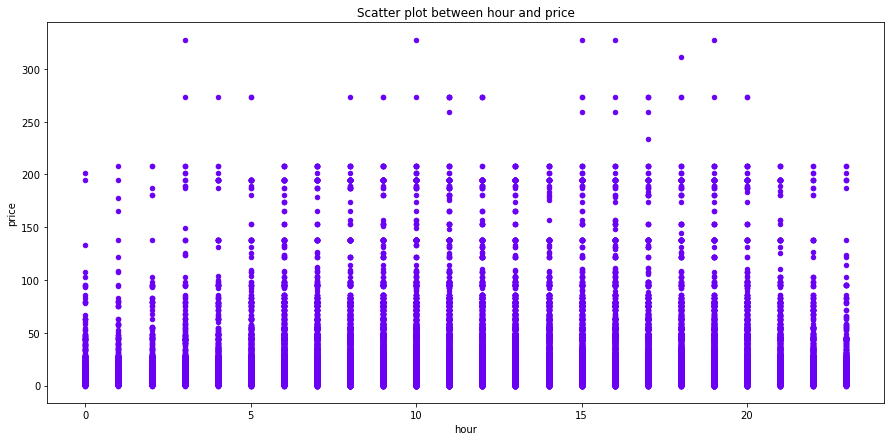

In [93]:
# Visualize each hour customer behavior
cos_new.plot(x='hour',
             y='price',
             kind='scatter', 
             stacked=False, 
             figsize = (15, 7),
             title='Scatter plot between hour and price',
             color='#6a00f4') 

Insights:

- Products attract different customer behaviors at fours particular price range: under 50, 50-100, 100-150 and over 150. For the product of price over $250, customer mostly purchased them between 3pm to 8pm.For other product prices, customers' purchasing behaviors are relatively similar. They don't locate at specific time period.

# Part 5 Clustering

## Prepare RFM Model Data

In [104]:
# group the data by "user_id", and calcualte each customer's recency, frequency, and monetary value

# step 1: calculate "Recency", set Feb 2020 as the reference month, and use "month" as the unit
d={10:4,11:3,12:2,1:1,2:0}
cos_df.loc[:,'Recency']=cos_df['month'].map(d)
df_R=cos_df.groupby('user_id')['Recency'].min().reset_index().rename(columns={"0":"Recency"})

# step 2: calculate "Frequency"
df_F=cos_df.groupby('user_id')['event_type'].count().reset_index().rename(columns={"event_type":"Frequency"})

# step 3: calculate "Monetary"
df_M=cos_df.groupby('user_id')['price'].sum().reset_index().rename(columns={"price":"Monetary"})

# step 4: merge "Recency", "Frequency", and "Monetary"
df_RF=pd.merge(df_R,df_F,on='user_id')
df_RFM=pd.merge(df_RF,df_M,on='user_id')

# step 5: remove outliers before clustering
conditions=np.abs(stats.zscore(df_RFM.loc[:,['Recency','Frequency','Monetary']]) < 3).all(axis=1)
df_RFM2=df_RFM.loc[conditions,:]

# step 6: remove user_id
clust_df = df_RFM2.iloc[:,1:4]

clust_df.head(5)

,Recency,Frequency,Monetary
0,1,3,30.00
1,3,1,4.05
2,2,1,25.40
3,3,25,129.52
4,0,1,25.38


## User-Defined Functions
Run the following code to load the user-defined functions used throughout this Notebook.

In [105]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

## Scale the data

In [106]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(clust_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(clust_df)


# converting scaled data into a DataFrame
rfm_scaled = pd.DataFrame(X_scaled)


# reattaching column names
rfm_scaled.columns = clust_df.columns


# checking pre- and post-scaling variance
print(np.var(clust_df), '\n\n')
print(np.var(rfm_scaled))

Recency          2.073470
Frequency      174.190930
Monetary     15483.406378
dtype: float64 


Recency      1.0
Frequency    1.0
Monetary     1.0
dtype: float64


## Principal Component Analysis

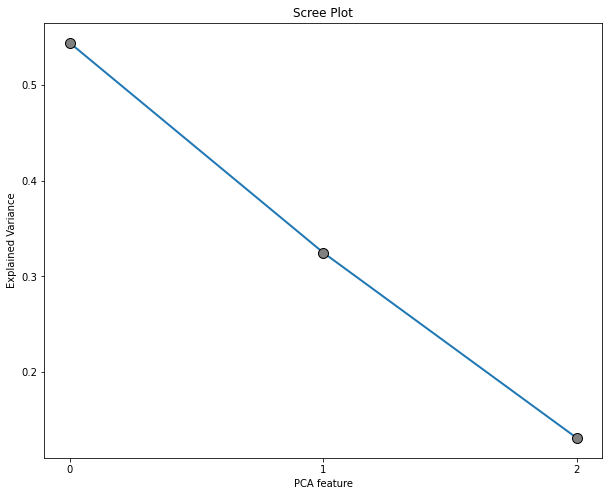

In [107]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca = pca.fit_transform(rfm_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [110]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(rfm_scaled.columns)

factor_loadings

,0,1,2
Recency,-0.197703,0.980083,-0.018715
Frequency,0.694402,0.126548,-0.708372
Monetary,0.691895,0.153043,0.705591


In [112]:
# naming each principal component
factor_loadings.columns = ['Loyal Customers',                 # high monetary and frequency
                             'New Customers',                   # high recency
                             'Potential Loyal']                 # low frequency, high monetary


# checking the result
factor_loadings

,Loyal Customers,New Customers,Potential Loyal
Recency,-0.197703,0.980083,-0.018715
Frequency,0.694402,0.126548,-0.708372
Monetary,0.691895,0.153043,0.705591


In [114]:
# analyzing factor strengths per customer
X_pca_reduced = pca.transform(rfm_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings.columns


# checking the results
X_pca_df

,Loyal Customers,New Customers,Potential Loyal
0,-0.213744,-0.652622,-0.005488
1,-0.737859,0.657554,-0.071287
2,-0.481847,0.003178,0.062775
3,1.222533,1.041993,-0.647943
4,-0.207363,-1.358116,0.088655
...,...,...,...
1184221,0.172247,-1.274149,0.475779
1184222,-0.216470,-1.362180,-0.027959
1184223,-0.158518,-1.351411,-0.076188
1184224,-0.331693,-1.385617,-0.038137


In [116]:
X_pca_df.to_csv('./analysis_results/PCA Factor Loadings.csv',
                  index = False)

## Clustering Process

In [118]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Loyal Customers',                 # high monetary and frequency
                     'New Customers',                   # high recency
                     'Potential Loyal']                 # low frequency, high monetary


# checking pre- and post-scaling variance
print(np.var(X_pca_df), '\n\n')
print(np.var(pca_scaled))

Loyal Customers    1.633227
New Customers      0.974455
Potential Loyal    0.392318
dtype: float64 


Loyal Customers    1.0
New Customers      1.0
Potential Loyal    1.0
dtype: float64


In [124]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    629093
2    506433
1     48700
Name: Cluster, dtype: int64


In [125]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Loyal Customers',                 # high monetary and frequency
                             'New Customers',                   # high recency
                             'Potential Loyal']                 # low frequency, high monetary


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Loyal Customers,New Customers,Potential Loyal
0,-0.30,0.75,0.05
1,3.52,0.49,-2.02
2,0.03,-0.98,0.13


Clusters:
- 0: New Customers （新客）
- 1: Loyal Customers （老客）
- 2: Customers need re-activation （流失用户）

# Part 6 Summary and Recommendations

**在EDA的过程中，我发现了以下规律：**

- 1.美妆消费者在每月月初的活跃度相比于其他时段要高；在黑色星期五时段美妆消费者的活跃度达到一年中的顶峰，而新年前后是一年中的低谷。

- 2.美妆消费者的点击、加入购物车、购买的行为集中在一天中的午晚餐时分。

- 3.对于贵妇级别的美妆产品，消费者的购买行为大多集中在下午三点到晚上八点的时间段；而其他价位的美妆产品购买则平均分布在一天中的各个时段。

根据上述的规律，品牌店铺要有针对性的进行电商广告投放以及促销、会员活动，保证在不同时段实现利润最大化。

**在聚类分析中，我利用RFM模型将美妆消费者分成三类：**

- 新客
- 老客
- 流失用户

对于新客，首先要提升消费者的活跃度从而提高转化率。品牌可以从以下方面入手。第一，促销力度+噱头玩法：对于电商来说，商品的力度噱头可以说是营销活动的基础，想让用户下单，就需要在价格上做文章，并且这种“便宜”的感觉必须被用户感知到。在商品让利、满减优惠券满天飞的当下，单纯的价格刺激已经稍显薄弱，从用户的角度来看，需要配合一些噱头玩法，才能增强用户占便宜的心理。比如推出新用户专属福利，开发新用户身份识别功能，上线仅新用户可见的超低价商品，如新人1元包邮等，可有效转化新用户；而老带新的玩法，则是用奖励的方式，调动老用户积极性并促使新用户下单；此外，秒杀的氛围也是将“限时低价”的氛围做足，迫使用户快速下单。第二，BI是一种产品功能，即淘宝和京东的猜你喜欢，将这个功能模块加入营销活动中，可以个性化地推介用户感兴趣的商品，增强商品转化。

对于老客，电商运营需要着重于留存方面。最关键的地方在于让用户不断重新认识到产品的不可或缺性，因此运营要不断挖掘消费者的偏好极其变化，准确触达。

对于流失客户，运营需要重新激活这类消费者，可以运用短信，APP推送，直播等形式重新获取消费者的兴趣，重新“种草”消费者。同时在运营过程中要把握好度，切勿用力过猛导致消费者逆反心理。

# Part 7 Reference

- 电商如何进行精细化运营？. (n.d.). Retrieved March 2, 2021, from 知乎专栏 website: https://zhuanlan.zhihu.com/p/47999372